# Data Visualization

## 1. Hello, Seaborn

In [1]:
# Import the libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
print("Setup Complete")

Setup Complete


In [2]:
# Load the dataset
data_path = ".\\..\\..\\..\\tutorials_data\\seaborn_data"
fifa_filepath = os.path.join(data_path, "fifa.csv")
fifa_data = pd.read_csv(fifa_filepath, index_col="Date", parse_dates=True)

In [3]:
# Examine the data
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


<AxesSubplot:xlabel='Date'>

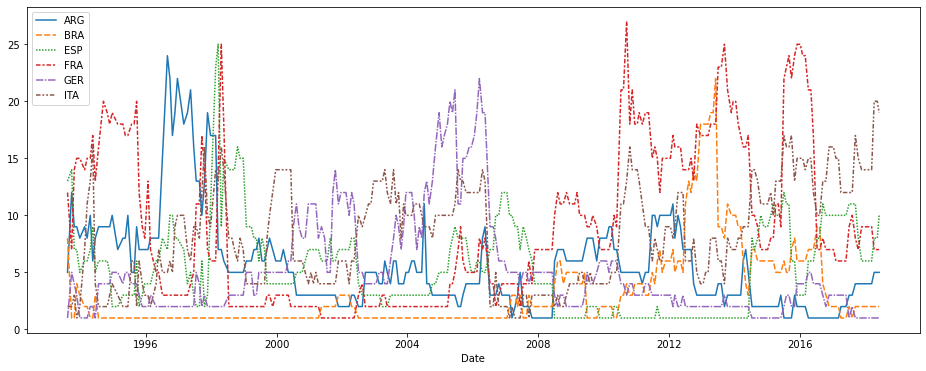

In [4]:
# Let's make our first plot: a line plot
plt.figure(figsize=(16,6))  # set width and height of the figure
sns.lineplot(data=fifa_data)

## 2. Line charts

In [5]:
# Load a new dataset
spotify_filepath = os.path.join(data_path, "spotify.csv")
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)

In [6]:
# Examinate the data
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


NaN values mean the song was not release on the corresponding date.

In [7]:
# Examinate the last data
spotify_data.tail()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


<AxesSubplot:xlabel='Date'>

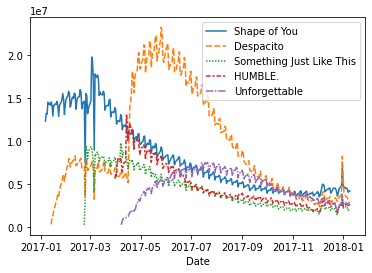

In [8]:
# Plot a line chart
sns.lineplot(data=spotify_data)

<AxesSubplot:title={'center':'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Date'>

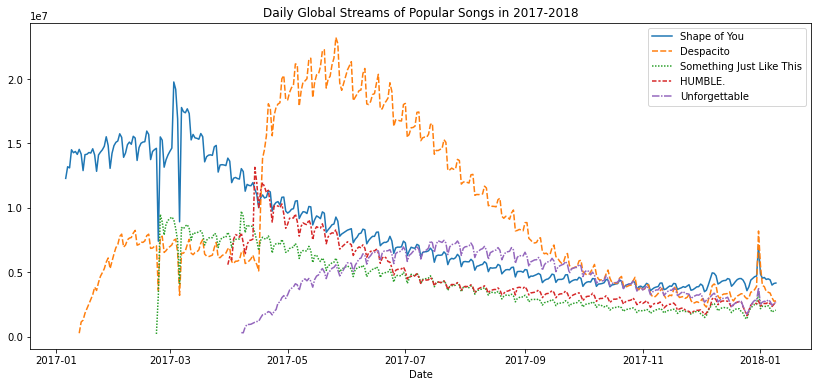

In [9]:
# Modifying the size of the figure and the 
# title of the chart
plt.figure(figsize=(14,6))  # figure's size (wxh) 14x6
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
sns.lineplot(data=spotify_data)

Let's now plot a subset of the data. Instead of all the columns, we want to select the ones we wanna plot.

In [10]:
# Let's inspect the column names
spotify_data.columns

Index(['Shape of You', 'Despacito', 'Something Just Like This', 'HUMBLE.',
       'Unforgettable'],
      dtype='object')

Text(0.5, 0, 'Date')

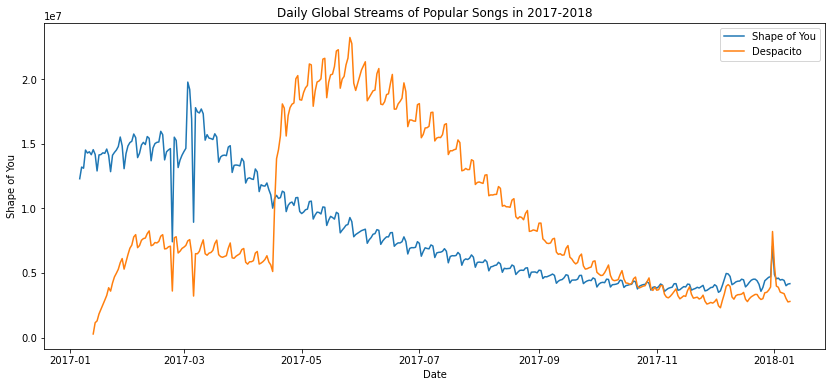

In [11]:
# Plot a line chart but only for the first two columns
plt.figure(figsize=(14,6))
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
sns.lineplot(data=spotify_data["Shape of You"], label="Shape of You")
sns.lineplot(data=spotify_data["Despacito"], label="Despacito")
plt.xlabel("Date")  # set a label for the x axis

## 2. Bar Charts and Heatmaps

In [12]:
# Load the dataset
flight_filepath = os.path.join(data_path, "flight_delays.csv")
flight_data = pd.read_csv(flight_filepath, index_col="Month")

In [13]:
# Examinate the dataset
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


### 2.1 Bar chart

Text(0, 0.5, 'Arrival delay (in minutes)')

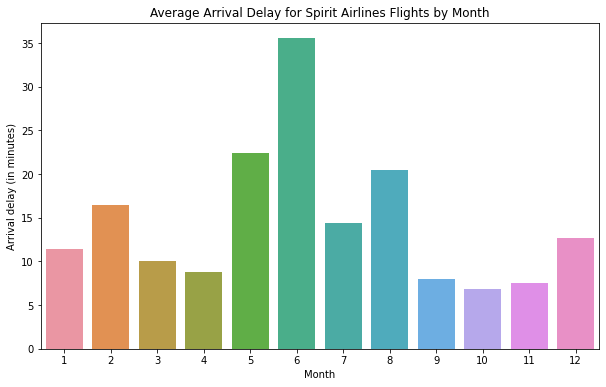

In [14]:
# Let's create a bar chart for the NK airline delays by month
plt.figure(figsize=(10, 6))
plt.title("Average Arrival Delay for Spirit Airlines Flights by Month")
sns.barplot(x=flight_data.index, y=flight_data["NK"])
plt.ylabel("Arrival delay (in minutes)")

### 2.2 Heatmap

Text(0.5, 42.0, 'Airline')

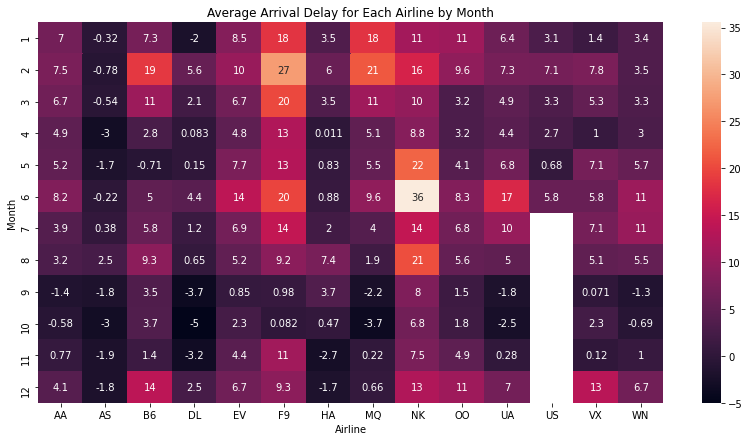

In [15]:
# Create a heatmap
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Each Airline by Month")
sns.heatmap(data=flight_data, annot=True)
plt.xlabel("Airline")

## 3. Scatter Plots

In [16]:
# Load the dataset
insurance_filepath = os.path.join(data_path, "insurance.csv")
insurance_data = pd.read_csv(insurance_filepath)

In [17]:
# Examine the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

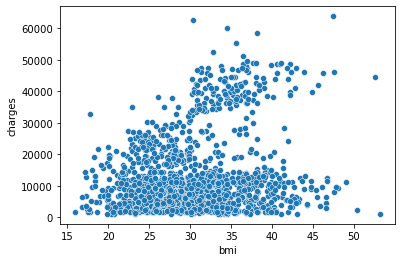

In [18]:
# Let's create a scatter plot
sns.scatterplot(x=insurance_data["bmi"], y=insurance_data["charges"])

It seems like 'BMI' is correlated with paid 'charges', because customers with higher BMI tend to pay more in insurance costs. Let's check this with a **regression line**.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

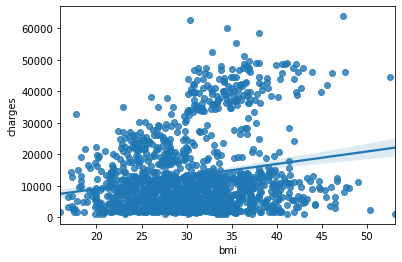

In [19]:
# Plot a regression line 
sns.regplot(x=insurance_data["bmi"], y=insurance_data["charges"])

We can display 3 variables in a scatter plot using color points.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

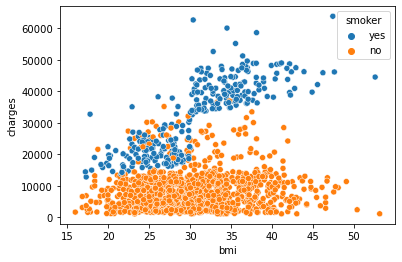

In [20]:
# Plot a scatter plot and color the points depending on if the
# person in smoker or not
sns.scatterplot(
    x=insurance_data["bmi"],
    y=insurance_data["charges"],
    hue=insurance_data["smoker"]
)

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay much more. Let's print two regression lines to ensure this fact.

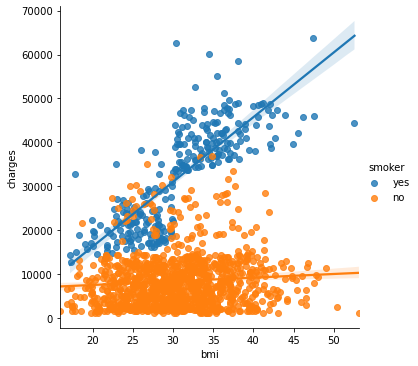

In [21]:
# Plot two regression lines
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

Apart from using scatter plots to plot relationship between two countinuous variables, we can use them to feature a categorical variable too. These plots are called **categorical scatter plots**.

C:\Users\Ana\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

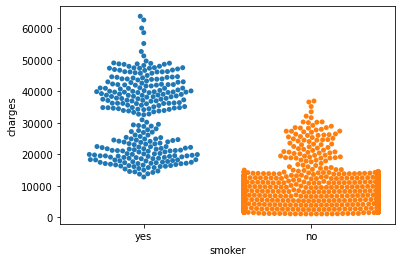

In [22]:
# Let's plot a categorical scatter plot
sns.swarmplot(
    x=insurance_data["smoker"],  # this is a categorical variable
    y=insurance_data["charges"]
)

On average, non-smokers are charged less than smokers.

## 4. Distributions: Histograms and Density plots

In [23]:
# Load the dataset
iris_filepath = os.path.join(data_path, "iris.csv")
iris_data = pd.read_csv(iris_filepath, index_col="Id")

In [24]:
# Examinate the dataset
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### 4.1 Histograms

C:\Users\Ana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petal Length (cm)'>

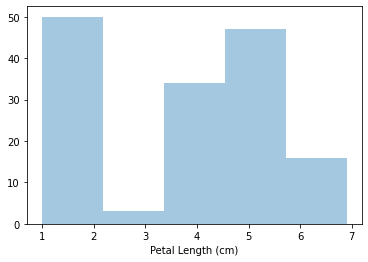

In [28]:
# Let's plot a histogram to see how petal length varies 
sns.distplot(a=iris_data["Petal Length (cm)"], kde=False)

### 4.2 Density plots

Next plot is called **Kernel Density Estimate (KDE)**. It's like a smoothed histogram.

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

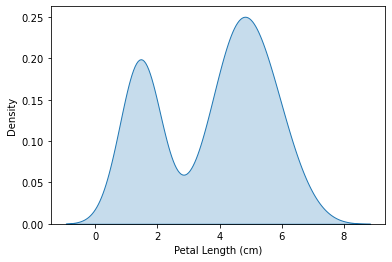

In [29]:
# Plot a kde to see how petal length varies
sns.kdeplot(data=iris_data["Petal Length (cm)"], shade=True)

We can plot 2D KDE plots between two variables too.

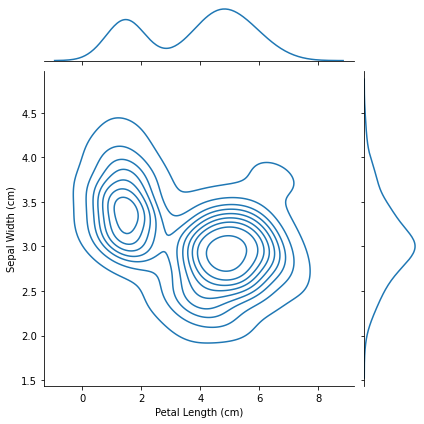

In [31]:
# Let's plot a 2D KDE between ``petal length´´ and ``sepal width´´
sns.jointplot(
    x=iris_data["Petal Length (cm)"],
    y=iris_data["Sepal Width (cm)"],
    kind="kde"
)

#### Color-coded plots

In [35]:
# Let's load three different datasets, one for each flower specie.
iris_set_filepath = os.path.join(data_path, "iris_setosa.csv")
iris_ver_filepath = os.path.join(data_path, "iris_versicolor.csv")
iris_vir_filepath = os.path.join(data_path, "iris_virginica.csv")

iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

In [36]:
# Examinate the data
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


C:\Users\Ana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


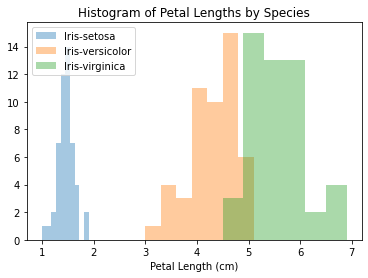

In [37]:
# Plot the histogram of each of the species
sns.distplot(a=iris_set_data["Petal Length (cm)"], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data["Petal Length (cm)"], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data["Petal Length (cm)"], label="Iris-virginica", kde=False)

plt.title("Histogram of Petal Lengths by Species")
plt.legend()  # force the legend to show

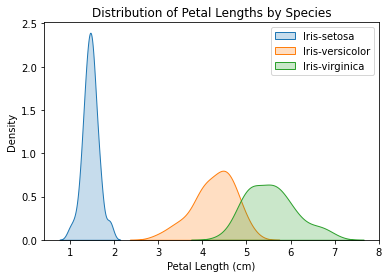

In [39]:
# Plot a KDE for each specie
sns.kdeplot(data=iris_set_data["Petal Length (cm)"], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data["Petal Length (cm)"], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data["Petal Length (cm)"], label="Iris-virginica", shade=True)

plt.title("Distribution of Petal Lengths by Species")
plt.legend()

## 5. Choosing Plot Types and Custom Styles

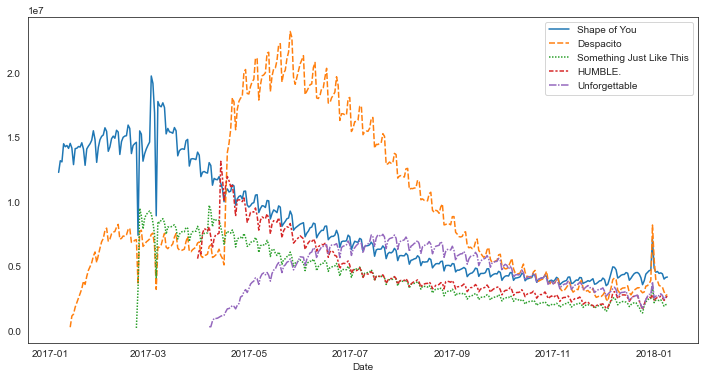

In [45]:
# Let's repeat the linechar we saw at the beggining
plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

<AxesSubplot:xlabel='Date'>

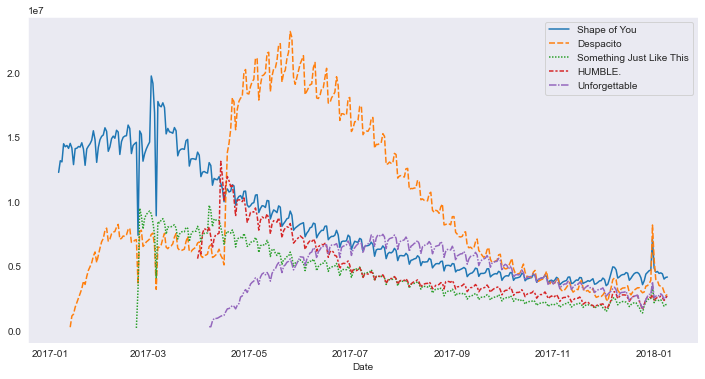

In [46]:
# Set a different style to the figure
plt.figure(figsize=(12,6))
sns.set_style("dark")
sns.lineplot(data=spotify_data)